In [1]:
# BeatSaber Ogg Onset Detection
# 2/16/2019
# David Haas, Ian Boll, Josh Mosier, Michael Keays

import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob

In [2]:
training_set_path = "../data/train.pkl"

opened = pickle.load(open( training_set_path, "rb" ))

In [24]:
data,labels = opened

for i, ian in enumerate(zip(data,labels)):
    d,l = ian
    if l.shape[0] < d.shape[0]:
        diff = d.shape[0] - l.shape[0]
        labels[i] = np.concatenate((labels[i], np.zeros(diff, dtype=np.bool)))

train_data = np.concatenate(data[:15]).swapaxes(1,3)
test_data = np.concatenate(data[15:]).swapaxes(1,3)

train_labels = np.concatenate(labels[:15]).astype(np.short, copy=False)
test_labels = np.concatenate(labels[15:]).astype(np.short, copy=False)


In [23]:
train_labels

array([False, False, False, ..., False, False, False])

In [19]:
train_labels.shape

(273023, 2)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

#create model
model = Sequential()

# add model layers
model.add(Conv2D(filters=10, kernel_size=(3,7), activation='relu', input_shape=(80,15,1)))
model.add(MaxPooling2D(pool_size=(3, 1)))
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 1)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.5))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 78, 9, 10)         220       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 9, 10)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 7, 10)         910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 7, 10)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 560)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               143616    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
__________

In [26]:
model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=3)

Train on 273023 samples, validate on 99935 samples
Epoch 1/3
273023/273023 [==============================] - 174s 639us/step - loss: 0.2222 - acc: 0.9783 - val_loss: 0.1000 - val_acc: 0.9787
Epoch 2/3
273023/273023 [==============================] - 156s 572us/step - loss: 0.2165 - acc: 0.9785 - val_loss: 0.0943 - val_acc: 0.9787
Epoch 3/3
273023/273023 [==============================] - 143s 523us/step - loss: 0.2174 - acc: 0.9787 - val_loss: 0.0919 - val_acc: 0.9787


In [65]:
song1_length = int(labels[0].shape[0]/2)
predict = model.predict(test_data[0:song1_length])
predict = [k[0] for k in predict]
actual = test_labels[0:song1_length]

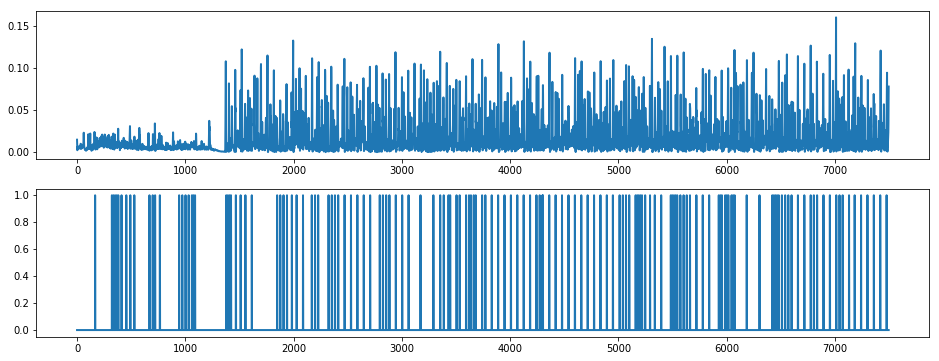

In [66]:
plt.figure(figsize=(16,6))
plt.subplot(211)
plt.plot(predict, linewidth=2.0)

plt.subplot(212)
plt.plot(actual, linewidth=2.0)
plt.show()